# Introduction

The goal of this notebook is to predict the diameter of an asteroid. 
Once you have gone through this notebook, understood the concepts and followed the additional exercises outlined here, you can (but do not have to) try to predict the class of asteroid based on the other data instead. Have fun !

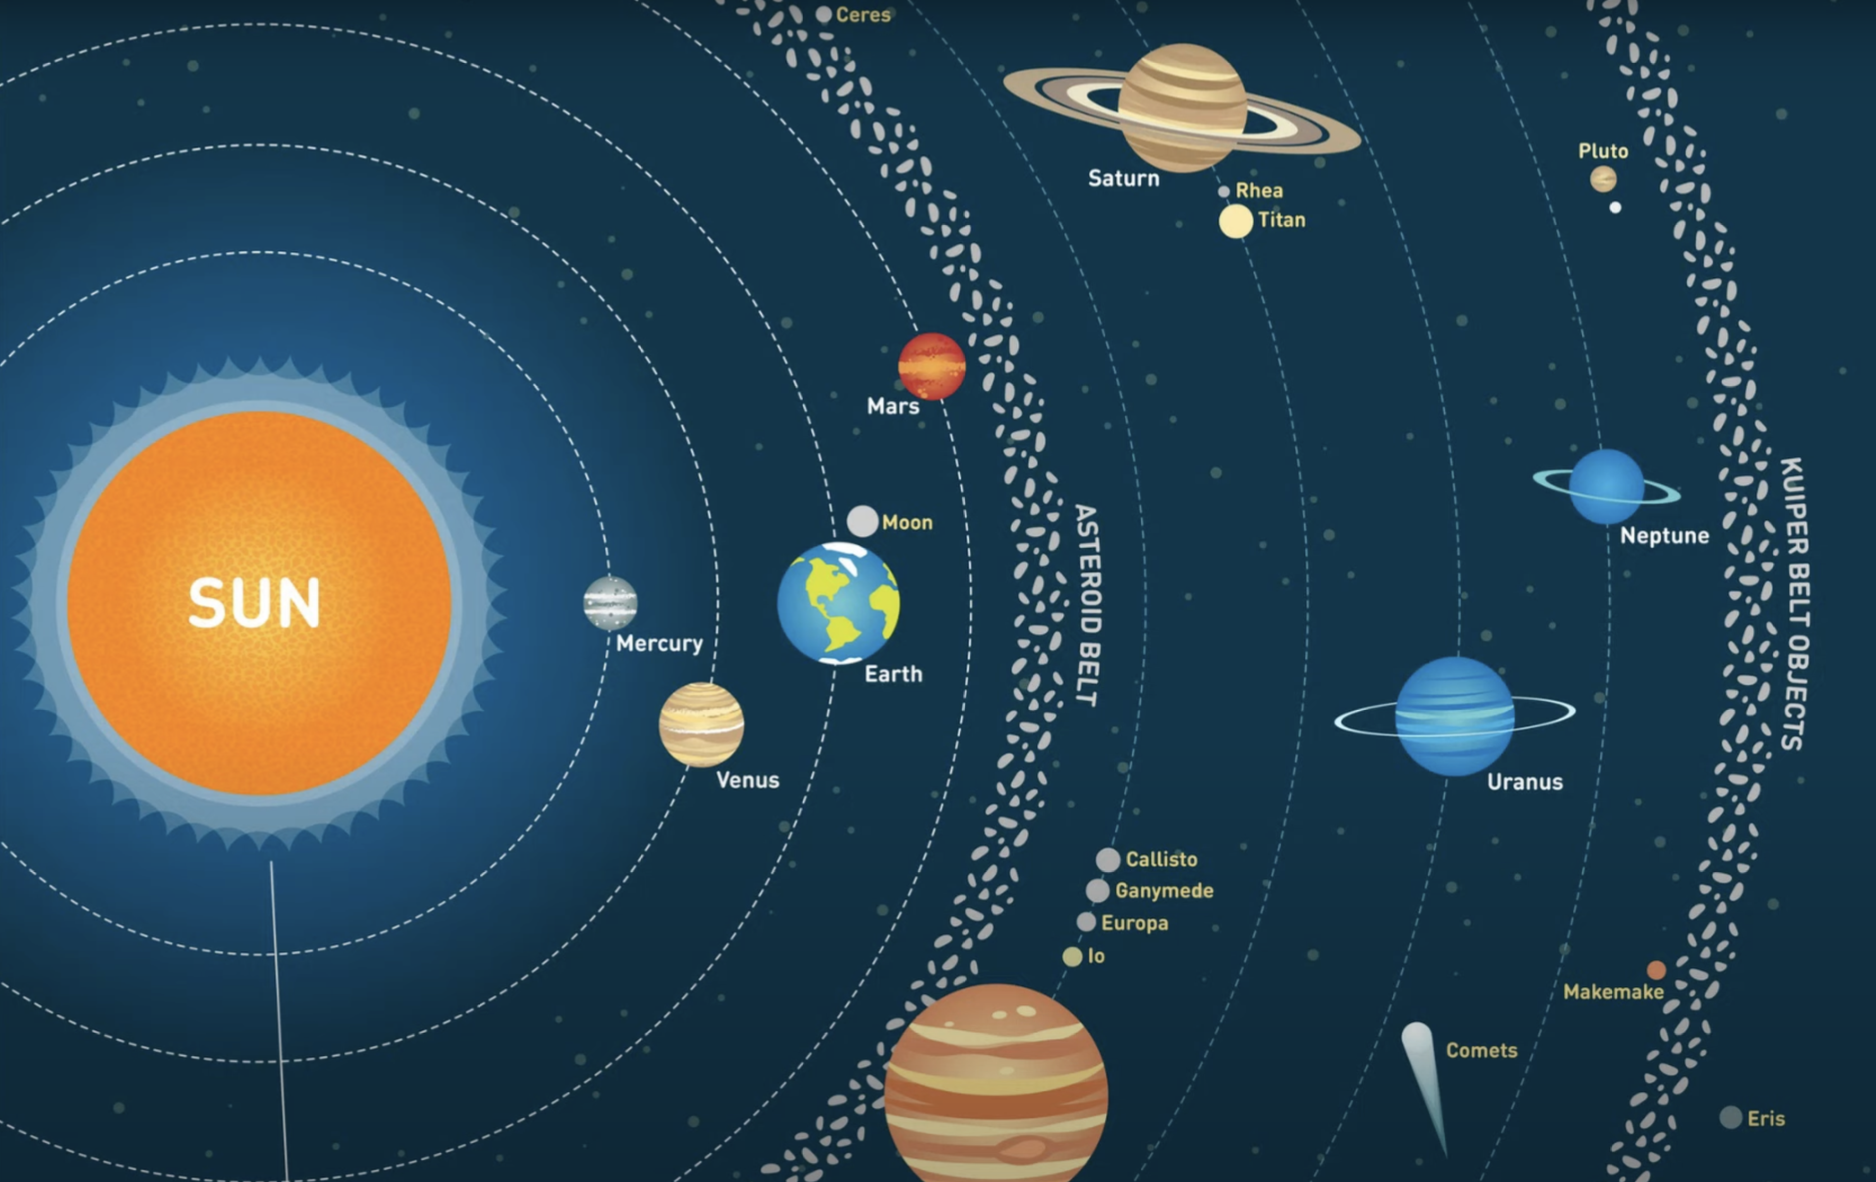

1. Main Belt Asteroids (MBAs) are located in the asteroid belt. The majority of MBAs are relatively small, with diameters less than 10 kilometers. However, there are also some much larger MBAs, known as "dwarf planets," like Ceres, which has a diameter of about 940 kilometers.
2. Near-Earth Objects (NEOs) are asteroids whose orbits bring them close
to Earth. They can range in size from a few meters to tens of kilometers in
diameter. Smaller NEOs are more common, but they can still pose a
significant impact hazard due to their proximity to Earth.
3. Trojan asteroids share the same orbit as a larger planet, such as Jupiter
or Neptune. They come in various sizes, but the largest ones can be
several tens of kilometers in diameter. However, smaller Trojans are more
common.
4. Trans-Neptunian Objects (TNOs) including Kuiper Belt Objects and
scattered disk objects, are asteroids located in the outer solar system
beyond Neptune. They can range in size from a few kilometers to
hundreds of kilometers or more in diameter. Some of the largest TNOs are
considered dwarf planets, like Pluto.

## Classes of asteroids

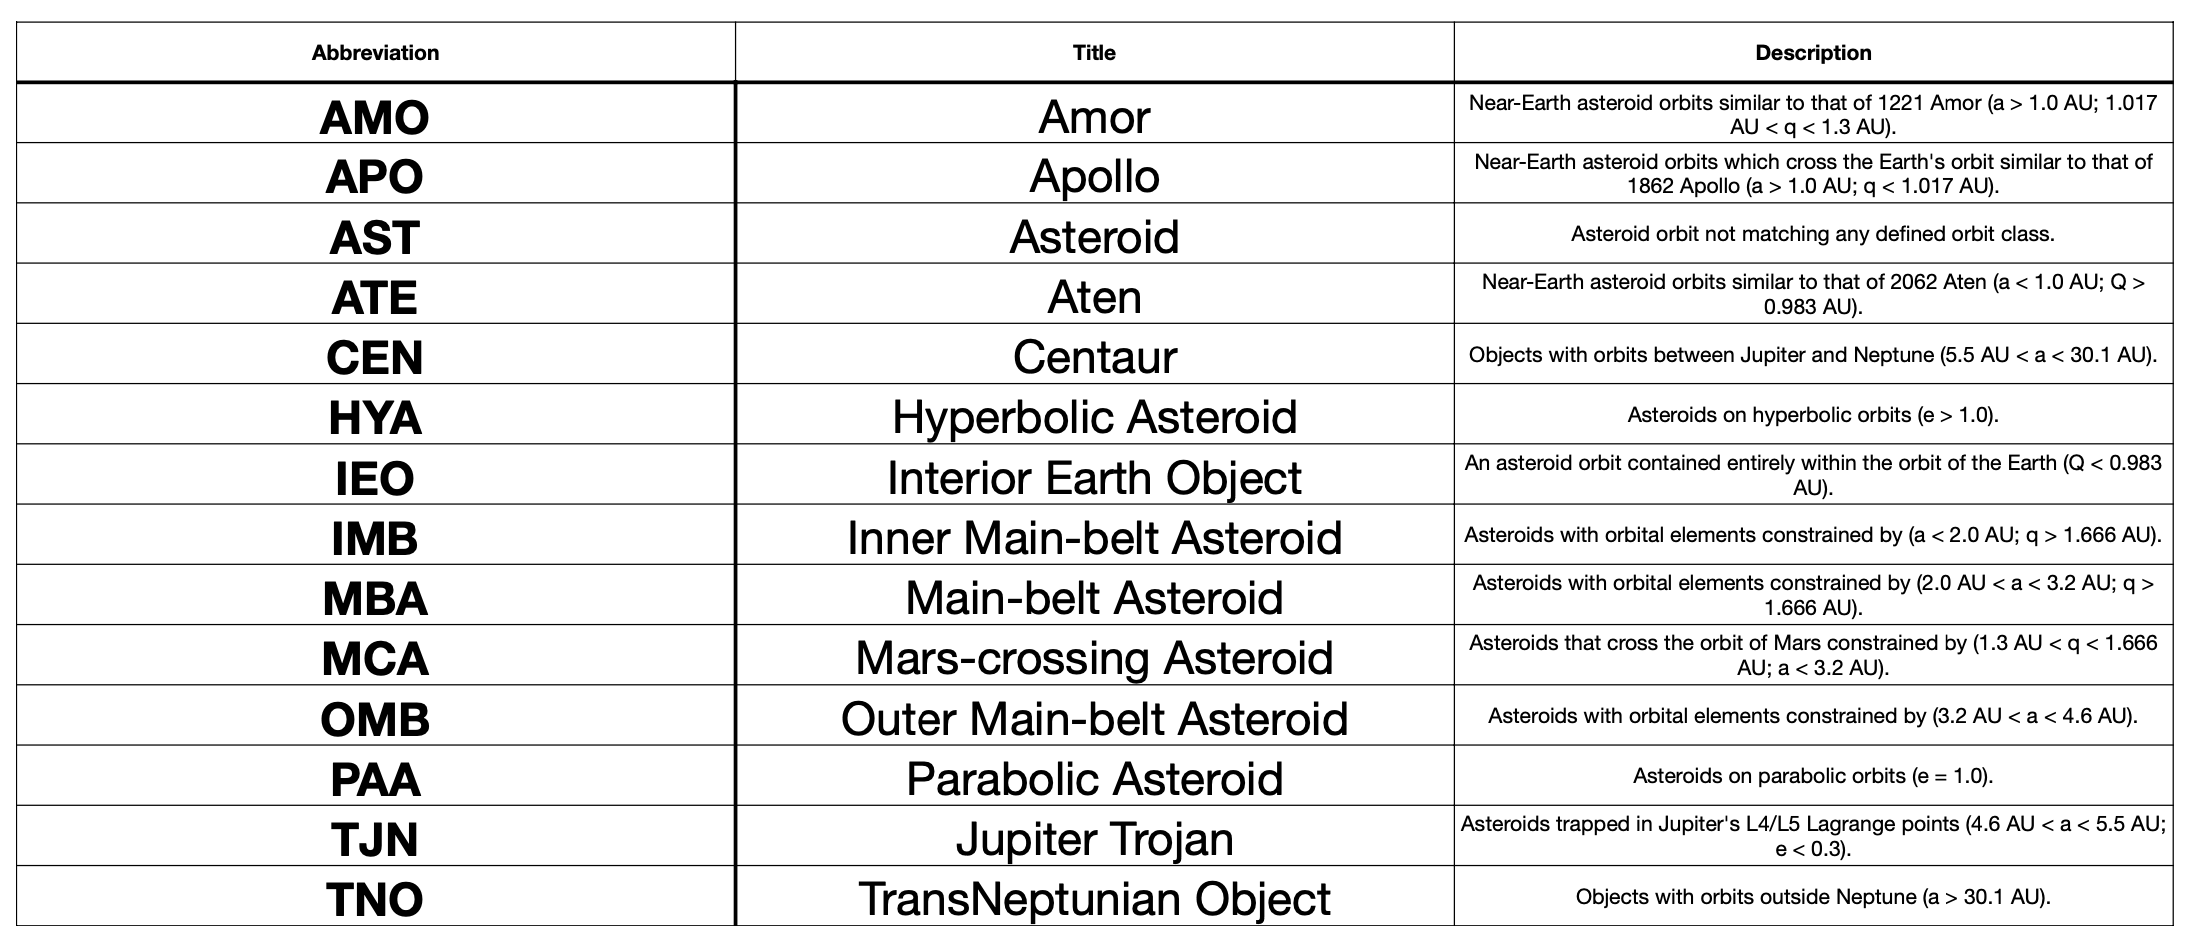

Parameters in the Dataset

* a semi-major_axis
* e eccentricity
* i Inclination with respect to x-y ecliptic plane(deg)
* w argument of perihelion
* q perihelion-distance
* ad aphelion distance(au)
* H Absolute Magnitude parameter
* neo near_earth_object
* pha potentialy_hazardous_asteroid
* diameter Diameter of asteroid(Km)
* extent Object bi/tri axial ellipsoid dimensions(Km)
* albedo 'geometric_albedo'
* BV color-index_BV_magnitude_dif
* UB color-index_UB_magnitude_dif
* IR color-index_IR_magnitude_dif
* rot_per rotation_period
* moid Earth Minimum orbit Intersection Distance(au)
* class 'asteroid orbit class'
* n mean_motion
* per sidereal_orrbital_period(d)

## Note ! 

1. you will need to install additional packages ; if you get an import error, you know what to do (pip, conda, whatever works for you)
2. The different parameters available in a method() are not always all explained, do refer to the online help when necessary.



In [130]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [131]:
original_dataset = pd.read_csv("Asteroid.csv", delimiter = ',', low_memory=False)
df = original_dataset.copy()

## Basic dataset exploration

In [132]:
print(df.shape)
df.head()

(839714, 31)


name         a         e          i          om           w         q  \
0    Ceres  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1   Pallas  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2     Juno  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3    Vesta  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4  Astraea  2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   

         ad     per_y  data_arc  ...     UB  IR  spec_B spec_T     G     moid  \
0  2.979647  4.608202    8822.0  ...  0.426 NaN       C      G  0.12  1.59478   
1  3.411067  4.616444   72318.0  ...  0.284 NaN       B      B  0.11  1.23324   
2  3.354967  4.360814   72684.0  ...  0.433 NaN      Sk      S  0.32  1.03454   
3  2.570926  3.628837   24288.0  ...  0.492 NaN       V      V  0.32  1.13948   
4  3.066174  4.130323   63507.0  ...  0.411 NaN       S      S   NaN  1.09589   

  class         n          per          ma  
0   MBA  0.213885  1683.145708   77.372096  
1   MBA  0.213503  1686.155999   59.699133  
2   MBA  0.226019  1592.787285   34.925016  
3   MBA  0.271609  1325.432765   95.861936  
4   MBA  0.238632  1508.600458  282.366289  

[5 rows x 31 columns]

Here we see that we have 31 columns, and 839714 rows in total.
You can also use describe() to get a feeling on the value distribution within each columns.

In [133]:
df.describe()

a              e              i             om  \
count  839712.000000  839714.000000  839714.000000  839714.000000   
mean        2.757514       0.155636       8.949826     168.499466   
std       114.384959       0.093897       6.666087     103.096307   
min   -104279.220927       0.000000       0.007546       0.000388   
25%         2.385258       0.091454       4.069077      80.211400   
50%         2.644219       0.143655       7.257101     160.294860   
75%         2.996048       0.199400      12.255653     252.201519   
max      3043.149073       1.201134     175.188725     359.999800   

                   w              q             ad          per_y  \
count  839714.000000  839714.000000  839708.000000  839713.000000   
mean      181.075796       2.404728       3.385710       6.859734   
std       104.023854       2.233172      12.748733     252.264249   
min         0.001666       0.070511       0.773684       0.000000   
25%        91.041603       1.971941       2.775350       3.683928   
50%       181.669478       2.225510       3.037761       4.299859   
75%       271.521717       2.578162       3.357967       5.185985   
max       359.999833      80.424175    6081.841956  167877.712688   

            data_arc     n_obs_used  ...       rot_per            GM  \
count  824240.000000  839714.000000  ...  18796.000000  1.400000e+01   
mean     5688.422331     259.191837  ...     21.136772  7.821928e+00   
std      4208.177231     371.759667  ...     73.131751  1.678880e+01   
min         0.000000       2.000000  ...      0.004389  2.100000e-09   
25%      3608.000000      50.000000  ...      4.210000  1.022225e-03   
50%      5806.000000     118.000000  ...      6.653000  6.192500e-01   
75%      7270.000000     296.000000  ...     12.624250  6.500000e+00   
max     72684.000000    9325.000000  ...   3240.000000  6.262840e+01   

                BV          UB    IR           G          moid             n  \
count  1021.000000  979.000000  1.00  119.000000  8.232720e+05  8.397120e+05   
mean      0.769212    0.364396 -0.33    0.178739  1.423371e+00  2.374145e-01   
std       0.088625    0.095780   NaN    0.134603  2.250450e+00  8.095014e-02   
min       0.580000    0.120000 -0.33   -0.250000  3.437640e-07  2.926897e-08   
25%       0.700000    0.289000 -0.33    0.100000  9.784998e-01  1.900553e-01   
50%       0.743000    0.360000 -0.33    0.190000  1.237810e+00  2.292228e-01   
75%       0.850000    0.439000 -0.33    0.250000  1.590560e+00  2.675475e-01   
max       1.077000    0.655000 -0.33    0.600000  7.950130e+01  2.381994e+00   

                per             ma  
count  8.397080e+05  839706.000000  
mean   2.505533e+03     180.659892  
std    9.213979e+04     106.562235  
min    1.511339e+02     -67.136826  
25%    1.345555e+03      86.642618  
50%    1.570524e+03     181.517775  
75%    1.894184e+03     274.301731  
max    6.131733e+07     491.618014  

[8 rows x 22 columns]

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

# Checking for missing values

In machine learning, particularly in classification tasks using algorithms such as XGBoost and LightGBM, the quality and completeness of the data are important for building robust models. Missing values in the dataset can lead to several issues that adversely affect the model's performance:

**Reduced Statistical Power**: Missing data reduces the representativeness of the sample, decreasing the statistical power of any analysis. This makes it harder to detect true effects or relationships between variables, leading to weaker and potentially biased model predictions.

**Biased Estimates**: If the missing values are not randomly distributed across the observations but are instead systematically missing, this can introduce bias into the model. For instance, if higher values are more likely to be missing, the model might underestimate the true effects or relationships.

**Inefficient Training**: Most advanced machine learning algorithms handle missing values internally. However, excessive missingness can still lead to inefficient model training, as the algorithms might need to spend additional computational resources to infer missing data or to adjust the training process accordingly.

**Compromised Model Accuracy**: Algorithms handle missing values in various ways (e.g., imputation, using missing bins as a separate category), each of which has assumptions and can affect the model differently. Incorrect handling or assumptions about the missing data can lead to models that are less accurate and generalizable to new data.

**Limitations in Model Complexity**: The presence of too many missing values can limit the complexity of the model you can reliably train. Some methods of dealing with missing data, like dropping rows or columns with missing values, can result in a significant reduction of the dataset size, thereby limiting the complexity and potential accuracy of the final model.

To mitigate these issues, it's crucial to perform a thorough analysis of the missing values. Understanding the patterns and mechanisms behind the missing data can help in choosing the most appropriate handling methods, whether it be imputation, using indicator variables for missingness, or employing algorithms robust to missing data. Addressing these issues effectively will lead to more reliable and stronger predictive models.

In [135]:
percent_missing = np.round(df.isnull().sum() * 100 / len(df),3)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)


column_name  percent_missing
IR                          IR          100.000
extent                  extent           99.998
GM                          GM           99.998
G                            G           99.986
spec_T                  spec_T           99.883
UB                          UB           99.883
BV                          BV           99.878
spec_B                  spec_B           99.802
rot_per                rot_per           97.762
name                      name           97.384
albedo                  albedo           83.755
diameter              diameter           83.609
pha                        pha            1.958
moid                      moid            1.958
data_arc              data_arc            1.843
H                            H            0.320
condition_code  condition_code            0.103
ad                          ad            0.001
per                        per            0.001
neo                        neo            0.001
ma                          ma            0.001
per_y                    per_y            0.000
w                            w            0.000
om                          om            0.000
i                            i            0.000
e                            e            0.000
n_obs_used          n_obs_used            0.000
class                    class            0.000
n                            n            0.000
a                            a            0.000
q                            q            0.000

In this example, we will remove columns with more than 97% missing values. 
This is somewhat arbitrary, experiment with this threshold yourself. 

In [136]:
dropCols=missing_value_df["column_name"][missing_value_df["percent_missing"]>97]
df.drop(columns =dropCols, inplace=True)

For the other observations, we will remove the rows that contains missing values. 
This will reduce the size of our dataset significantly. We will see later on an alternative approach to deal with missing values

In [137]:
# dropped rows in which 'diameter','data_arc' or 'albedo' value is missing
df=df.dropna(subset = ['diameter', 'albedo', 'data_arc'])

## Converting column types

We should also converts the types of certain columns, as so. 
We could have noticed that earlier while doing df.info()

In [138]:
convertDict = {'diameter' : float, 'condition_code': int}
df = df.astype(convertDict)

## Handling Missing Data in Skewed Continuous Features

When dealing with missing values in continuous data that is skewed, using the median to fill in these gaps is often preferred over the mean. The median is less sensitive to outliers and extreme values, which are common in skewed distributions, and represents the central tendency more accurately in such cases.

**Why Use Median?**

**Robustness to Outliers**: In skewed data, outliers can drastically affect the mean, but the median remains unaffected because it is the middle value after sorting the data.

**Better Representation of Central Tendency**: In skewed distributions, the median provides a better center of data, which more effectively represents a typical value than the mean.

**Alternative Methods to Handle Missing Values**

Depending on the nature of your data and the specific requirements of your analysis or predictive modeling, you may consider other methods to handle missing values:

**Mean Imputation**: For normally distributed data or when the data is not significantly affected by outliers, filling missing values with the mean can be appropriate.

**Mode Imputation**: For categorical data, or when a certain value overwhelmingly occurs more frequently, filling in missing values with the mode (the most common value) can be effective.

**K-Nearest Neighbors (KNN) Imputation**: This method uses the K-nearest neighbors of a data point with missing values and imputes them by averaging (for continuous variables) or mode (for categorical variables) of the neighbors. This is useful when data patterns are complex and not easily captured by simple central tendency metrics.

**Interpolation**: For data that follow a temporal sequence (time series), linear or polynomial interpolation can estimate missing values based on surrounding data points.

**Advanced Imputation Techniques**: Techniques such as multiple imputation or using machine learning models like regression or decision trees to predict and replace missing values can also be considered, especially when a significant portion of data is missing or when the missing data is hypothesized to contain valuable information.

In [139]:
percent_missing = np.round(df.isnull().sum() * 100 / len(df),3)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)


column_name  percent_missing
H                            H              0.2
a                            a              0.0
per                        per              0.0
n                            n              0.0
class                    class              0.0
moid                      moid              0.0
albedo                  albedo              0.0
diameter              diameter              0.0
pha                        pha              0.0
neo                        neo              0.0
n_obs_used          n_obs_used              0.0
e                            e              0.0
condition_code  condition_code              0.0
data_arc              data_arc              0.0
per_y                    per_y              0.0
ad                          ad              0.0
q                            q              0.0
w                            w              0.0
om                          om              0.0
i                            i              0.0
ma                          ma              0.0

In [140]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer


# Create a copy of the dataframe for each imputation method
df_mean = df.copy()
df_mode = df.copy()
df_knn = df.copy()
df_interpolate = df.copy()
df_multiple = df.copy()

# Apply each imputation method
df_mean['H'] = df_mean['H'].fillna(df_mean['H'].mean())
df_mode['H'] = df_mode['H'].fillna(df_mode['H'].mode()[0])

knn_imputer = KNNImputer(n_neighbors=5)
df_knn['H'] = knn_imputer.fit_transform(df_knn[['H']])

df_interpolate['H'] = df_interpolate['H'].interpolate(method='linear')

iterative_imputer = IterativeImputer()
df_multiple['H'] = iterative_imputer.fit_transform(df_multiple[['H']])

# Identify the indices where original data was missing
missing_indices = df[df['H'].isnull()].index

# Create a DataFrame to compare imputed values at missing indices
comparison_df = pd.DataFrame({
    'Original': df.loc[missing_indices, 'H'],
    'Mean Imputation': df_mean.loc[missing_indices, 'H'],
    'Mode Imputation': df_mode.loc[missing_indices, 'H'],
    'KNN Imputation': df_knn.loc[missing_indices, 'H'],
    'Linear Interpolation': df_interpolate.loc[missing_indices, 'H'],
    'Multiple Imputation': df_multiple.loc[missing_indices, 'H']
})

comparison_df


Original  Mean Imputation  Mode Imputation  KNN Imputation  \
621015       NaN        15.168089             15.2       15.168089   
621063       NaN        15.168089             15.2       15.168089   
621141       NaN        15.168089             15.2       15.168089   
621173       NaN        15.168089             15.2       15.168089   
621178       NaN        15.168089             15.2       15.168089   
...          ...              ...              ...             ...   
635415       NaN        15.168089             15.2       15.168089   
635459       NaN        15.168089             15.2       15.168089   
635498       NaN        15.168089             15.2       15.168089   
635571       NaN        15.168089             15.2       15.168089   
635651       NaN        15.168089             15.2       15.168089   

        Linear Interpolation  Multiple Imputation  
621015                 17.00            15.168089  
621063                 17.20            15.168089  
621141                 16.50            15.168089  
621173                 16.70            15.168089  
621178                 16.90            15.168089  
...                      ...                  ...  
635415                 16.35            15.168089  
635459                 16.25            15.168089  
635498                 16.55            15.168089  
635571                 17.15            15.168089  
635651                 17.25            15.168089  

[272 rows x 6 columns]

As usual, it is best to explore your data before chosing the method. Use your best judgement! 

-0.6884481065665834


<Axes: >

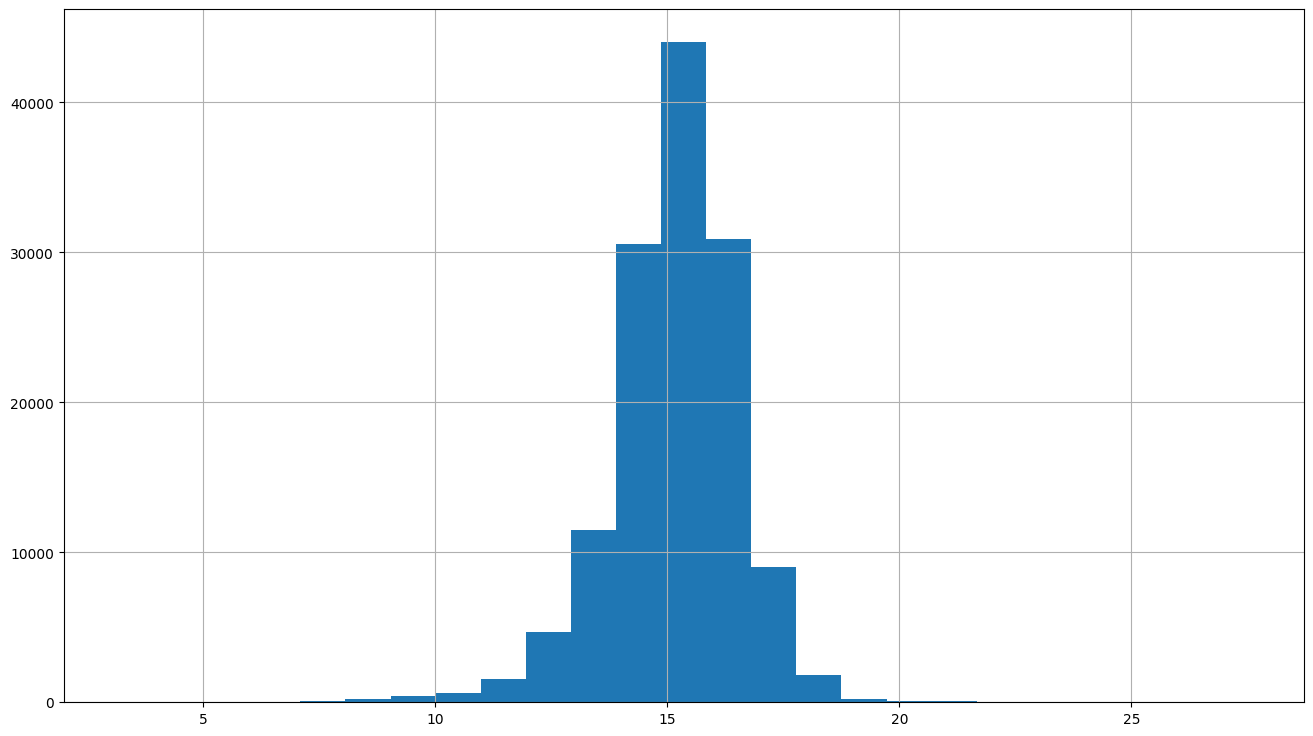

In [141]:
# Here we looked for skewedness 
print(df['H'].skew())
df['H'].hist(figsize=(16, 9),bins='doane')

In [142]:
# In case of continuous skewed data "median" represents the central tendency best. 
# So we will use that here. You should try to replace this imputation by another method and see how the models 
# react later on (keep this for now) 
df['H'] = df['H'].fillna(df['H'].median())

In [143]:
df.shape #dropping the na values leaves us with this much data rows

(136277, 21)

# Removing Multicollinearity with VIF (Variance Inflation Factor)

In multiple regression analysis, the Variance Inflation Factor (VIF) is a statistical measure used to assess the degree of multicollinearity among the independent variables. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to separate their individual effects on the dependent variable.

**Steps to Calculate VIF**:
1. Regression of Independent Variables: For each independent variable in the model, set up a separate regression model using this variable as the dependent variable and all other independent variables as predictors.

2. Calculation of R-squared: Determine the R-squared value for each regression model. This statistic measures the proportion of variance in the dependent variable that is predictable from the independent variables.

3. VIF Computation: Calculate the VIF for each independent variable using the formula: VIF = 1 / (1 - R-squared)
​
 
This formula quantifies how much the variance of an estimated regression coefficient increases due to multicollinearity.

**Interpreting VIF Values**:
VIF Greater Than 1: Indicates the presence of multicollinearity. The higher the VIF, the greater the correlation among the independent variables, and the more severe the multicollinearity.

**Threshold for Concern**: A commonly used threshold is a VIF of 5 or greater, which suggests problematic levels of multicollinearity that may distort the regression coefficients and their interpretation.

**Strategies to Reduce Multicollinearity**:
1. Remove Correlated Variables: One approach is to remove some of the highly correlated independent variables to reduce multicollinearity.

2. Principal Component Analysis (PCA): This technique transforms the correlated variables into a new set of uncorrelated variables, which can then be used in the regression analysis.


In [144]:
df_cleaned = df.copy()

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df.select_dtypes(include=numerics) 

In [145]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):
    '''
    This function calculates variance inflation factor (VIF) using sklearn. It's a faster approach.
    '''
    # Initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # Calculate VIF for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # Fit model and extract r-squared
        model = LinearRegression().fit(X, y)
        r_squared = model.score(X, y)

        # Handle perfect multicollinearity
        if r_squared == 1:
            vif = float('inf')  # Can use a large number if infinity is not desired
        else:
            vif = 1 / (1 - r_squared)

        vif_dict[exog] = vif
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # Create DataFrame to return
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})
    return df_vif

# Usage of the function (assuming 'df' is your DataFrame)
df_vif = sklearn_vif(exogs=df.columns, data=df).sort_values(by='VIF', ascending=False)
while (df_vif.VIF > 5).any():
    df_vif = df_vif.drop(df_vif.index[0])
    df = df[df_vif.index]
    df_vif = sklearn_vif(exogs=df.columns, data=df).sort_values(by='VIF', ascending=False)

print(df.shape)


(136277, 13)


In [146]:
df

n_obs_used      moid  data_arc         n  diameter         e  albedo  \
0             1002  1.594780    8822.0  0.213885   939.400  0.076009  0.0900   
1             8490  1.233240   72318.0  0.213503   545.000  0.230337  0.1010   
2             7104  1.034540   72684.0  0.226019   246.596  0.256942  0.2140   
3             9325  1.139480   24288.0  0.271609   525.400  0.088721  0.4228   
4             2916  1.095890   63507.0  0.238632   106.699  0.191095  0.2740   
...            ...       ...       ...       ...       ...       ...     ...   
797835          47  0.854315    2250.0  0.175794     1.077  0.430349  0.1160   
797860          50  1.663010    2373.0  0.174527     3.793  0.159119  0.0210   
798077          33  1.367330    3297.0  0.242270     2.696  0.076071  0.0610   
799752          27  1.166840    2208.0  0.184914     3.271  0.287449  0.0720   
810375          25  1.159420    3458.0  0.262217     1.600  0.109001  0.0230   

                i  condition_code     per_y          om           w  \
0       10.594067               0  4.608202   80.305532   73.597694   
1       34.836234               0  4.616444  173.080063  310.048857   
2       12.988919               0  4.360814  169.852760  248.138626   
3        7.141771               0  3.628837  103.810804  150.728541   
4        5.366988               0  4.130323  141.576605  358.687607   
...           ...             ...       ...         ...         ...   
797835  28.718353               2  5.606716  115.532995  136.849398   
797860  27.098625               1  5.647402  309.036573   19.746812   
798077  11.593237               2  4.068291  246.298656  170.090810   
799752  14.456779               2  5.330196  343.917822  342.614839   
810375   4.525668               3  3.758822  148.244819   31.949854   

                ma  
0        77.372096  
1        59.699133  
2        34.925016  
3        95.861936  
4       282.366289  
...            ...  
797835  195.737632  
797860  164.999439  
798077  145.319581  
799752  175.708508  
810375  170.888415  

[136277 rows x 13 columns]

How did our dataset change ?

## Categorical data

In datasets, you often find variables classified into two major types: numerical and categorical. Numerical data represents values that are measurable and can be ordered or ranked, like age or temperature. Categorical data, however, includes variables that represent categories or labels, such as gender or the color of a car.

**Categorical data can be further classified into**:

**Nominal**: No intrinsic ordering to the categories. Examples include colors, zip codes, or types of cuisine.
**Ordinal**: There is a clear ordering of the categories but the intervals between categories are not necessarily equal. Examples include educational level, job grades, or customer satisfaction ratings.

**The Need for One-Hot Encoding**
Many machine learning algorithms, especially those based on equations (like linear regression or logistic regression), require input to be numerical. This necessity arises because these algorithms perform calculations that involve multiplication and addition of inputs to arrive at predictions. With categorical data in its raw form (such as text), these operations are not feasible. Therefore, we need a method to convert categorical data into a numerical format, and this is where one-hot encoding comes into play.

**What is One-Hot Encoding?**
One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to improve predictions. For each unique category in a feature, one-hot encoding creates a new binary column (0s and 1s), which indicates the presence of that category in the record.

**Example**:
Consider a feature "Color" with three categories: Red, Green, and Blue. One-hot encoding this feature creates three new features:

Is_Red (1 if the color is red, 0 otherwise)

Is_Green (1 if the color is green, 0 otherwise)

Is_Blue (1 if the color is blue, 0 otherwise)

A record with the color Red will be represented as [1, 0, 0], Green as [0, 1, 0], and Blue as [0, 0, 1].

**Advantages of One-Hot Encoding**

1. Non-numeric to Numeric Conversion: It converts data into a format that can be easily worked with by typical ML algorithms.
Maintains Feature Independence: By creating separate columns for each category and marking them as 0 or 1, it ensures that the model does not inherit artificial orderings (where none exists, as in nominal data) among categories.
2. Easy to Implement: Most data processing libraries, such as pandas, provide built-in functions to apply one-hot encoding easily.

**Considerations and Limitations**
1. Dimensionality Increase: One-hot encoding can significantly increase the dataset’s dimensionality (i.e., number of features), particularly if the categorical variable has many categories. This can lead to more complex models, which require more data and computational power to train.
2. Sparse Matrix: If most of the categories are rarely present, the resulting encoded matrix will be sparse (filled mostly with zeros), which might require special handling and storage optimizations.
3. Loss of Information: Information about the categories, like an order in ordinal data, might be lost unless the data is specifically encoded to retain this.

In [147]:
categoricalData = df_cleaned.select_dtypes(include=['object']).copy()
categoricalData.head(5)

neo pha class
0   N   N   MBA
1   N   N   MBA
2   N   N   MBA
3   N   N   MBA
4   N   N   MBA

In [148]:
categoricalData['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO'], dtype=object)

In [149]:
print(categoricalData['neo'].value_counts(),"\n")
print(categoricalData['pha'].value_counts(),"\n")
print(categoricalData['class'].value_counts(),"\n")

neo
N    135476
Y       801
Name: count, dtype: int64 

pha
N    136079
Y       198
Name: count, dtype: int64 

class
MBA    125188
OMB      7425
TJN      1874
IMB       570
APO       454
MCA       350
AMO       256
ATE        91
CEN        49
TNO        13
AST         7
Name: count, dtype: int64 



In [150]:
ohe_categoricalData= pd.get_dummies(categoricalData, columns=['class','neo','pha'], drop_first=True)
ohe_categoricalData

class_APO  class_AST  class_ATE  class_CEN  class_IMB  class_MBA  \
0           False      False      False      False      False       True   
1           False      False      False      False      False       True   
2           False      False      False      False      False       True   
3           False      False      False      False      False       True   
4           False      False      False      False      False       True   
...           ...        ...        ...        ...        ...        ...   
797835      False      False      False      False      False       True   
797860      False      False      False      False      False       True   
798077      False      False      False      False      False       True   
799752      False      False      False      False      False       True   
810375      False      False      False      False      False       True   

        class_MCA  class_OMB  class_TJN  class_TNO  neo_Y  pha_Y  
0           False      False      False      False  False  False  
1           False      False      False      False  False  False  
2           False      False      False      False  False  False  
3           False      False      False      False  False  False  
4           False      False      False      False  False  False  
...           ...        ...        ...        ...    ...    ...  
797835      False      False      False      False  False  False  
797860      False      False      False      False  False  False  
798077      False      False      False      False  False  False  
799752      False      False      False      False  False  False  
810375      False      False      False      False  False  False  

[136277 rows x 12 columns]

In [151]:
cleanDf = pd.concat([df,ohe_categoricalData],axis = 1)
cleanDf

n_obs_used      moid  data_arc         n  diameter         e  albedo  \
0             1002  1.594780    8822.0  0.213885   939.400  0.076009  0.0900   
1             8490  1.233240   72318.0  0.213503   545.000  0.230337  0.1010   
2             7104  1.034540   72684.0  0.226019   246.596  0.256942  0.2140   
3             9325  1.139480   24288.0  0.271609   525.400  0.088721  0.4228   
4             2916  1.095890   63507.0  0.238632   106.699  0.191095  0.2740   
...            ...       ...       ...       ...       ...       ...     ...   
797835          47  0.854315    2250.0  0.175794     1.077  0.430349  0.1160   
797860          50  1.663010    2373.0  0.174527     3.793  0.159119  0.0210   
798077          33  1.367330    3297.0  0.242270     2.696  0.076071  0.0610   
799752          27  1.166840    2208.0  0.184914     3.271  0.287449  0.0720   
810375          25  1.159420    3458.0  0.262217     1.600  0.109001  0.0230   

                i  condition_code     per_y  ...  class_ATE  class_CEN  \
0       10.594067               0  4.608202  ...      False      False   
1       34.836234               0  4.616444  ...      False      False   
2       12.988919               0  4.360814  ...      False      False   
3        7.141771               0  3.628837  ...      False      False   
4        5.366988               0  4.130323  ...      False      False   
...           ...             ...       ...  ...        ...        ...   
797835  28.718353               2  5.606716  ...      False      False   
797860  27.098625               1  5.647402  ...      False      False   
798077  11.593237               2  4.068291  ...      False      False   
799752  14.456779               2  5.330196  ...      False      False   
810375   4.525668               3  3.758822  ...      False      False   

        class_IMB  class_MBA  class_MCA  class_OMB  class_TJN  class_TNO  \
0           False       True      False      False      False      False   
1           False       True      False      False      False      False   
2           False       True      False      False      False      False   
3           False       True      False      False      False      False   
4           False       True      False      False      False      False   
...           ...        ...        ...        ...        ...        ...   
797835      False       True      False      False      False      False   
797860      False       True      False      False      False      False   
798077      False       True      False      False      False      False   
799752      False       True      False      False      False      False   
810375      False       True      False      False      False      False   

        neo_Y  pha_Y  
0       False  False  
1       False  False  
2       False  False  
3       False  False  
4       False  False  
...       ...    ...  
797835  False  False  
797860  False  False  
798077  False  False  
799752  False  False  
810375  False  False  

[136277 rows x 25 columns]

# Removing outlier

Removing outliers is an important preprocessing step in machine learning, particularly when preparing data for classification tasks. They can arise due to various reasons, such as measurement errors, data entry errors, or genuine variability in the dataset. Their presence can skew and mislead the training process of machine learning algorithms, resulting in longer training times, less accurate models, and ultimately poorer results.

**Importance of Removing Outliers**
1. Improved Model Accuracy: Outliers can have a disproportionate impact on the mean and standard deviation of data, which can mislead some algorithms that assume data is normally distributed.
2. Enhanced Model Training: Certain models are sensitive to outliers. For example, linear regression models can have their slope and intercept significantly altered by a single outlier.
3. Generalization: By removing outliers, models can generalize better from the training data to unseen data, thus performing better during validation and testing phases.


**Local Outlier Factor (LOF)**

LOF measures the local density deviation of a given data point with respect to its neighbors. It is an unsupervised method that assumes outliers are those points that have a substantially lower density than their neighbors.

**Isolation Forest**

Isolation Forest isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. Since outliers are few and different, they are expected to be easier to isolate compared to normal points.

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN groups together closely packed points and marks as outliers those points that lie alone in low-density regions. This method does not require one to specify the number of clusters beforehand.

**Z-Score**

The Z-score method involves calculating how many standard deviations away a data point is from the mean. Points that are a certain number of standard deviations (threshold) away are considered outliers.


In [155]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# Standardize data for certain algorithms
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cleanDf)

# Create copies of the original DataFrame for each method
df_lof = cleanDf.copy()
df_iforest = cleanDf.copy()
df_dbscan = cleanDf.copy()
df_zscore = cleanDf.copy()

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20)
df_lof['outlier'] = lof.fit_predict(cleanDf)
df_lof['outlier'] = df_lof['outlier'].map({1: 'normal', -1: 'outlier'})

# Apply Isolation Forest
iforest = IsolationForest(random_state=0)
df_iforest['outlier'] = iforest.fit_predict(data_scaled)
df_iforest['outlier'] = df_iforest['outlier'].map({1: 'normal', -1: 'outlier'})

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
df_dbscan['outlier'] = dbscan.fit_predict(data_scaled)
df_dbscan['outlier'] = df_dbscan['outlier'].map({-1: 'outlier', 1: 'normal', 0: 'normal'})

# Apply Z-Score for outlier detection
z_thresh = 3
z_scores = (cleanDf - cleanDf.mean()) / cleanDf.std()
df_zscore['outlier'] = np.where((z_scores.abs() > z_thresh).any(axis=1), 'outlier', 'normal')

# Combine the results into a single DataFrame for comparison
results = pd.DataFrame({
    'LOF': df_lof['outlier'],
    'Isolation Forest': df_iforest['outlier'],
    'DBSCAN': df_dbscan['outlier'],
    'Z-Score': df_zscore['outlier']
})

In [156]:
# If you want to see only the rows where at least one method detected an outlier:
outliers_detected = results[(results == 'outlier').any(axis=1)]

outliers_detected


LOF Isolation Forest   DBSCAN  Z-Score
0       outlier           normal  outlier  outlier
1       outlier          outlier  outlier  outlier
2       outlier          outlier  outlier  outlier
3       outlier          outlier  outlier  outlier
4        normal          outlier  outlier  outlier
...         ...              ...      ...      ...
797835   normal          outlier  outlier  outlier
797860   normal           normal  outlier   normal
798077   normal           normal  outlier   normal
799752   normal           normal  outlier   normal
810375   normal           normal  outlier   normal

[136266 rows x 4 columns]

In [157]:
# Count the number of 'outlier' labels for each method
outlier_counts = results.apply(lambda x: (x == 'outlier').sum())

# Print the counts
print(outlier_counts)

LOF                    390
Isolation Forest     14748
DBSCAN              136266
Z-Score              21298
dtype: int64


The result you're seeing from DBSCAN suggesting nearly all data points are outliers. This is likely due to the parameters chosen for the DBSCAN algorithm, specifically the eps and min_samples settings. These parameters directly influence the definition of what constitutes a dense region (i.e., a cluster) versus an outlier. It is important not to trust blindly an algorithm and always check the online help to understand the parameters you are using (and even more important to check what the DEFAULT parameters are!) 

**Understanding DBSCAN Parameters**
1. eps (epsilon): This is the maximum distance between two samples for them to be considered as in the same neighborhood. If eps is set too small, most data points will not be within this distance of others, and thus almost all points will be considered outliers.

2. min_samples: This defines the minimum number of points required to form a dense region. A higher value means that more points are required to form a cluster, which can lead to more points being considered as outliers if the data is sparse or not well clustered.

**How to Adjust DBSCAN Parameters**
1. Increase eps: If almost all points are being labeled as outliers, you might want to increase the eps value. This will enlarge the neighborhoods, potentially allowing more points to be included in clusters.

2. Decrease min_samples: Lowering this value means that fewer points are needed to form a cluster, which can reduce the number of outliers if your data naturally forms smaller clusters.


In [158]:
# As an example, we'll use LocalOutlierFactor. Be sure to try with different methods ! 

from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)  # Adjust n_neighbors as needed
outlier_scores = lof.fit_predict(cleanDf)
filtered_data = cleanDf[outlier_scores != -1]


In [159]:
filtered_data

n_obs_used      moid  data_arc         n  diameter         e  albedo  \
4             2916  1.095890   63507.0  0.238632   106.699  0.191095  0.2740   
6             5206  0.846100   62452.0  0.267535   199.830  0.231206  0.2766   
7             2744  0.874176   62655.0  0.301681   147.491  0.156499  0.2260   
8             2649  1.106910   61821.0  0.267484   190.000  0.123114  0.1180   
9             3409  1.778390   62175.0  0.177007   407.120  0.112461  0.0717   
...            ...       ...       ...       ...       ...       ...     ...   
797835          47  0.854315    2250.0  0.175794     1.077  0.430349  0.1160   
797860          50  1.663010    2373.0  0.174527     3.793  0.159119  0.0210   
798077          33  1.367330    3297.0  0.242270     2.696  0.076071  0.0610   
799752          27  1.166840    2208.0  0.184914     3.271  0.287449  0.0720   
810375          25  1.159420    3458.0  0.262217     1.600  0.109001  0.0230   

                i  condition_code     per_y  ...  class_ATE  class_CEN  \
4        5.366988               0  4.130323  ...      False      False   
6        5.523651               0  3.684105  ...      False      False   
7        5.886955               0  3.267115  ...      False      False   
8        5.576816               0  3.684806  ...      False      False   
9        3.831560               0  5.568291  ...      False      False   
...           ...             ...       ...  ...        ...        ...   
797835  28.718353               2  5.606716  ...      False      False   
797860  27.098625               1  5.647402  ...      False      False   
798077  11.593237               2  4.068291  ...      False      False   
799752  14.456779               2  5.330196  ...      False      False   
810375   4.525668               3  3.758822  ...      False      False   

        class_IMB  class_MBA  class_MCA  class_OMB  class_TJN  class_TNO  \
4           False       True      False      False      False      False   
6           False       True      False      False      False      False   
7           False       True      False      False      False      False   
8           False       True      False      False      False      False   
9           False       True      False      False      False      False   
...           ...        ...        ...        ...        ...        ...   
797835      False       True      False      False      False      False   
797860      False       True      False      False      False      False   
798077      False       True      False      False      False      False   
799752      False       True      False      False      False      False   
810375      False       True      False      False      False      False   

        neo_Y  pha_Y  
4       False  False  
6       False  False  
7       False  False  
8       False  False  
9       False  False  
...       ...    ...  
797835  False  False  
797860  False  False  
798077  False  False  
799752  False  False  
810375  False  False  

[135887 rows x 25 columns]

# Scaling features

Now we use 'StandardScaler' on the dataset. Other scalers exist but this lecture is long enough already ...

Most machine learning algorithms perform better or converge faster when features are on a relatively similar scale and close to normally distributed. StandardScaler achieves this by removing the mean and scaling each feature/variable to unit variance. This standardization of features is crucial because features often use different scales, and their performance might depend in varying degrees on the magnitude of the features.

**Improving Algorithm Performance**: Many machine learning algorithms, like Support Vector Machines (SVMs) and k-nearest neighbors (k-NN), are sensitive to the magnitude of features. They assume that all features are centered around zero and have variance in the same order. If a feature’s variance is orders of magnitude more than the variance of other features, it might dominate the objective function and make the estimator unable to learn from other features correctly.

**Handling Outliers**: StandardScaler is less sensitive to outliers than other scaling methods. By focusing on the mean and standard deviation of the data, this scaling can reduce the effect of outliers on the calculation of feature scales. However, significant outliers can still skew the results, so it is always a good practice to handle outliers before applying scaling.

**Algorithm Requirements**: Certain algorithms, like gradient descent methods, which are often used in neural networks, logistic regression, and other algorithms that involve loss optimization, benefit significantly from scaling. Gradient descent converges much faster with feature scaling than without it.

**Consistency Across Data**: Standardizing features ensures that the classifier treats all features equally, especially when they are measured in different units (like height in cm and weight in kg). Without scaling, the model might become biased towards features with a larger magnitude.



In [160]:
from sklearn.preprocessing import StandardScaler

# Identify the columns with numerical data
numerical_columns = filtered_data.select_dtypes(include=['number']).columns

# Create a DataFrame containing only the numerical columns
numerical_data = filtered_data[numerical_columns]

# Standardize the numerical data
scaler = StandardScaler()
scaled_numerical_data = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_columns)

# Realign the index of scaled_numerical_data with filtered_data
scaled_numerical_data.index = filtered_data.index

# Combine the scaled numerical data with the boolean columns
cleanDf = pd.concat([scaled_numerical_data, filtered_data.select_dtypes(include=['bool'])], axis=1)


In [161]:
cleanDf

n_obs_used      moid  data_arc         n   diameter         e  \
4         3.795370 -0.677587  8.923223  0.354517  12.423469  0.608318   
6         7.681291 -1.198856  8.750468  0.883258  23.850732  1.136836   
7         3.503501 -1.140266  8.783709  1.507913  17.428687  0.152481   
8         3.342295 -0.654590  8.647142  0.882326  22.644581 -0.287409   
9         4.631946  0.746672  8.705109 -0.772822  49.285413 -0.427784   
...            ...       ...       ...       ...        ...       ...   
797835   -1.073062 -1.181712 -1.107529 -0.795014  -0.536451  3.760801   
797860   -1.067971  0.505894 -1.087388 -0.818183  -0.203195  0.186998   
798077   -1.096819 -0.111139 -0.936084  0.421079  -0.337798 -0.907263   
799752   -1.107000 -0.529527 -1.114407 -0.628180  -0.267245  1.877918   
810375   -1.110394 -0.545011 -0.909721  0.785973  -0.472278 -0.473374   

          albedo         i  condition_code     per_y  ...  class_ATE  \
4       1.308466 -0.735738       -0.235075 -0.414592  ...      False   
6       1.332107 -0.712268       -0.235075 -0.714858  ...      False   
7       0.872018 -0.657840       -0.235075 -0.995456  ...      False   
8      -0.109988 -0.704303       -0.235075 -0.714386  ...      False   
9      -0.530978 -0.965769       -0.235075  0.553035  ...      False   
...          ...       ...             ...       ...  ...        ...   
797835 -0.128173  2.762652        0.827022  0.578892  ...      False   
797860 -0.991975  2.519992        0.295974  0.606270  ...      False   
798077 -0.628269  0.197049        0.827022 -0.456334  ...      False   
799752 -0.528250  0.626051        0.827022  0.392818  ...      False   
810375 -0.973790 -0.861781        1.358071 -0.664580  ...      False   

        class_CEN  class_IMB  class_MBA  class_MCA  class_OMB  class_TJN  \
4           False      False       True      False      False      False   
6           False      False       True      False      False      False   
7           False      False       True      False      False      False   
8           False      False       True      False      False      False   
9           False      False       True      False      False      False   
...           ...        ...        ...        ...        ...        ...   
797835      False      False       True      False      False      False   
797860      False      False       True      False      False      False   
798077      False      False       True      False      False      False   
799752      False      False       True      False      False      False   
810375      False      False       True      False      False      False   

        class_TNO  neo_Y  pha_Y  
4           False  False  False  
6           False  False  False  
7           False  False  False  
8           False  False  False  
9           False  False  False  
...           ...    ...    ...  
797835      False  False  False  
797860      False  False  False  
798077      False  False  False  
799752      False  False  False  
810375      False  False  False  

[135887 rows x 25 columns]

# Training

Now, we want to predict the diameter of the asteroid as explained in the introduction

In [162]:
# separate the variables into features and target
X= cleanDf.drop(['diameter'],axis = 1)
y = cleanDf['diameter']


In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


# Random forest regressor


A Random Forest consists of a large number of individual decision trees that operate as an ensemble. Each tree in the Random Forest predicts a value for the given inputs, and the final output is obtained by averaging these values (for regression tasks).

**Training Process:**

1. Bootstrap Aggregating (Bagging): Each tree in the forest is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. This technique is known as bagging, which helps in reducing variance and avoiding overfitting.
2. Feature Randomness: When splitting a node during the construction of the tree, the choice of the split is no longer the best among all features. Instead, the split that is picked is the best among a random subset of the features. This strategy of random selection of features results in a forest that is more diverse, and it also leads to lower correlation between trees, increasing overall robustness.
3. Prediction: this averaging makes the Random Forest comparatively good at predicting complex datasets with fewer tendencies to overfit on the training data.

One of the useful by-products from using Random Forest is the straightforward computation of feature importance. This can help in understanding the input features that contribute most to the prediction output, which can be valuable for feature selection.
However, training a large number of deep trees can be computationally costly and require more memory and time.


In [170]:
from sklearn.ensemble import RandomForestRegressor

RFReg= RandomForestRegressor(n_estimators=400, max_features=3, max_depth=6) # change those parameters and see what happens
RFReg.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=3, n_estimators=400)

In [171]:
from sklearn.metrics import mean_squared_error, r2_score 

print(f"Training score: {RFReg.score(X_train, y_train)}")
print(f"Testing score: {RFReg.score(X_test, y_test)}")

y_pred= RFReg.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Training score: 0.658850174947299
Testing score: 0.6416878144925996
Mean Squared Error: 0.3398120598046717


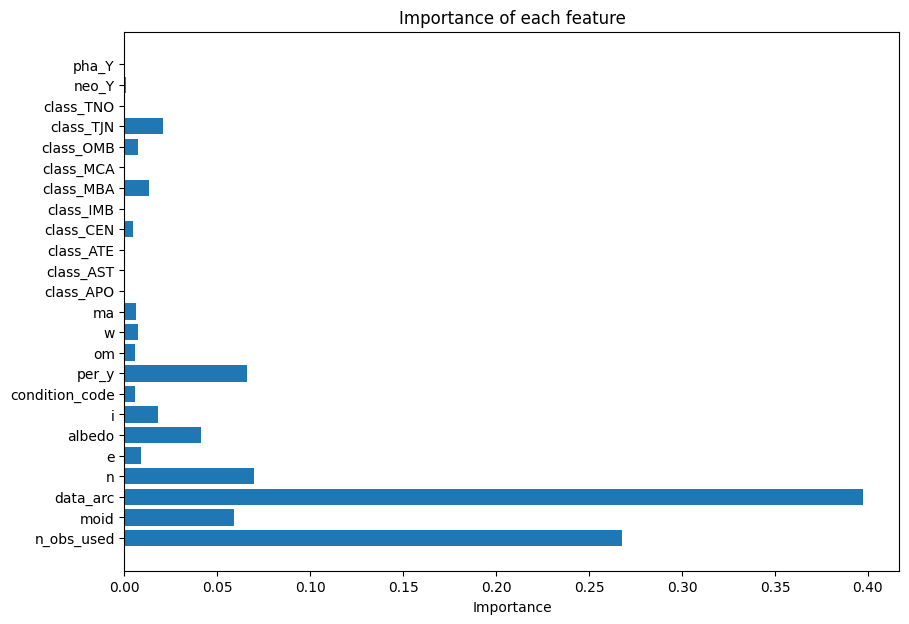

In [172]:
feature_names = X_train.columns
feature_importances = RFReg.feature_importances_

f, ax = plt.subplots(figsize=(10, 7))
ax.barh(range(len(feature_importances)), feature_importances)
ax.set_yticks(range(len(feature_importances)))
ax.set_yticklabels(feature_names)
ax.set_title("Importance of each feature")
ax.set_xlabel("Importance")
plt.show()

# XGBoost

XGBoost is based on the principle of gradient boosting, a method where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. This is done sequentially, such that each new model incrementally improves the overall prediction.

XGBoost’s objective function is a combination of a loss function and a regularization term. The loss function depends on the specific problem being solved (e.g., regression loss for regression problems). The regularization term helps to smooth the final learned weights to avoid overfitting.

While gradient boosting typically grows trees greedily, XGBoost improves upon this by considering a more systematic exploration of the possible splits for each tree. Instead of stopping once a negative loss is encountered, XGBoost will grow a full tree and then prune it backward to find the optimal tree size.

**Regularization**:

XGBoost includes L1 (Lasso regression) and L2 (Ridge regression) regularization, which reduces overfitting and improves model generalization capabilities. Try using those and read the online help to know how regularizations can be used, and what their effect is on the final accuracy of the model 

Also, this thing is fast ! 

In [166]:
from xgboost import XGBRegressor

# Create an instance of XGBRegressor and set eval_metric and early_stopping_rounds using set_params
XGBReg = XGBRegressor(eval_metric="logloss") # others here : https://xgboost.readthedocs.io/en/stable/parameter.html
XGBReg.set_params(early_stopping_rounds=30)

eval_set = [(X_test, y_test)]
XGBReg.fit(X_train, y_train, eval_set=eval_set, verbose=0)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=30,
             enable_categorical=False, eval_metric='logloss',
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [167]:
print(f"Training score: {XGBReg.score(X_train, y_train)}")
print(f"Testing score: {XGBReg.score(X_test, y_test)}")

y_pred= XGBReg.predict(X_test)
print(f'\nMean Squared Error: {mean_squared_error(y_test, y_pred)}')

Training score: 0.986616726796474
Testing score: 0.7892320628087265

Mean Squared Error: 0.19988571356100054


Note the high training score and the lower testing score ; 
this is quite usual but in this case it could indicate overfitting ... 

# Light GBM

This is another powerful, efficient, and popular gradient boosting framework that is designed to be distributed and efficient with lower memory usage. 

Similar to XGBoost, LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It builds trees one at a time, where each new tree helps to correct errors made by previously trained trees.

**Leaf-wise Tree Growth**:

Unlike other boosting frameworks that grow trees level-wise (depth-first), LightGBM grows trees leaf-wise (best-first). This means it chooses the leaf with maximum delta loss to grow. While this approach can sometimes lead to increased complexity and overfitting, it generally results in better reductions of loss and thus more accurate models.

It can handle large datasets by using a fraction of the data to find the best split points which is called Gradient-based One-Side Sampling (GOSS). It also uses Exclusive Feature Bundling (EFB) that reduces the number of features effectively without much loss of accuracy.
Thus, LightGBM is faster than many other gradient boosting methods, particularly on large datasets.


LightGBM can handle categorical features internally (it uses one-hot encoding by default). This simplifies the preprocessing pipeline, as there's no need to manually convert categorical features into numerical ones. (but we did it anyway for the other methods in this notebook!) 

In [168]:
import lightgbm as lgb

LGBReg = lgb.LGBMRegressor()

LGBReg.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='mse')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2834
[LightGBM] [Info] Number of data points in the train set: 95120, number of used features: 21
[LightGBM] [Info] Start training from score 0.000586


LGBMRegressor()

In [169]:

print(f"Training score: {LGBReg.score(X_train, y_train)}")
print(f"Testing score: {LGBReg.score(X_test, y_test)}")

y_pred= LGBReg.predict(X_test)
print(f'\nMean Squared Error: {mean_squared_error(y_test, y_pred)}')

Training score: 0.9373488091865602
Testing score: 0.8043443875692856

Mean Squared Error: 0.1855536578480455
